# Module 3: Exploratory Data Analysis

## Introduction
In this module, we will delve into Exploratory Data Analysis (EDA) focusing on the Titanic dataset. Our primary goal is to understand the underlying patterns and relationships within the data, with a specific emphasis on the visual and graphical representation of these elements. This will not only aid in gaining insightful observations but also in making informed decisions during subsequent modeling phases.

## Objectives
1. **Simple EDA**: We aim to visually explore the Titanic dataset to uncover distributions, correlations, and anomalies. This includes:
   - Analyzing the distribution of key features.
   - Identifying patterns and relationships between different variables.
   - Checking for outliers and missing values to assess data quality.

## Dataset Description
The Titanic dataset contains data for a number of passengers aboard the famous ship, Titanic. It provides detailed demographic information, ticket details, and survival outcomes which make it an excellent resource for binary classification tasks, such as predicting survival. Here is a breakdown of the features included in the dataset:

- **survival**: Survival status (0 = No, 1 = Yes)
- **class**: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- **sex**: Sex of the passenger (0 = female, 1 = male)
- **age**: Age of the passenger
- **sibsp**: Number of Siblings/Spouses Aboard
- **parch**: Number of Parents/Children Aboard
- **fare**: Passenger Fare
- **cabin**: Have Cabin (0 = No, 1 = Yes)
- **embarked**: Port of Embarkation

## Expected Outcomes
By the end of this module, we expect to:
- Have a clear understanding of the key features and their impact on survival rates aboard the Titanic.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Data Collection

In [2]:
import requests

# URLs of the files
train_data_url = 'https://www.raphaelcousin.com/modules/module3/course/module3_course_train.csv'
test_data_url = 'https://www.raphaelcousin.com/modules/module3/course/module3_course_test.csv'

# Function to download a file
def download_file(url, file_name):
    response = requests.get(url)
    response.raise_for_status()  # Ensure we notice bad responses
    with open(file_name, 'wb') as file:
        file.write(response.content)
    print(f'Downloaded {file_name} from {url}')

# Downloading the files
download_file(train_data_url, 'module3_course_train.csv')
download_file(test_data_url, 'module3_course_test.csv')

Downloaded module3_course_train.csv from https://www.raphaelcousin.com/modules/module3/course/module3_course_train.csv
Downloaded module3_course_test.csv from https://www.raphaelcousin.com/modules/module3/course/module3_course_test.csv


In [3]:
df =  pd.read_csv("module3_course_train.csv", sep=",", index_col='id')

## Data Analysis
This section provides a detailed examination of the dataset through various analytical methods to understand the distribution, correlations, and other statistical properties of the features. We'll explore the dataset to identify potential issues like missing values and outliers and to understand the underlying patterns that may influence the outcomes of the predictive model.


#### Dataset Overview

In [4]:
df

,pclass,sex,age,sibsp,parch,fare,cabin,embarked,survived
id,,,,,,,,,
772,3,1,-1.0,1,0.0,19.9667,0,Manchester,0
543,1,0,54.0,1,0.0,59.4000,0,Paris,1
289,2,0,48.0,0,2.0,36.7500,0,Manchester,1
10,3,1,34.0,1,1.0,14.4000,0,Manchester,0
147,2,0,33.0,0,2.0,26.0000,0,Manchester,1
...,...,...,...,...,...,...,...,...,...
1095,3,0,NaN,0,0.0,8.6625,0,Manchester,0
1130,2,1,28.0,0,1.0,33.0000,0,Manchester,0
1294,3,0,-1.0,1,9.0,69.5500,0,Manchester,0


In [5]:
df.shape

(1047, 9)

**Insight:**


The dataset contains 1047 rows and 9 columns.

In [6]:
# Display sample rows of the dataset
print("Sample of the dataset:")
df.sample(10)

Sample of the dataset:


,pclass,sex,age,sibsp,parch,fare,cabin,embarked,survived
id,,,,,,,,,
704,1,1,-1.0,0,0.0,221.7792,1,Manchester,0
264,3,0,22.0,0,0.0,7.7500,0,Manchester,1
775,3,1,24.0,0,0.0,7.8542,0,Manchester,0
338,3,0,27.0,0,1.0,12.4750,1,Manchester,1
807,2,1,27.0,0,0.0,13.0000,0,Manchester,0
16,2,1,39.0,0,0.0,13.0000,0,Manchester,0
185,1,0,40.0,0,0.0,153.4625,1,Manchester,1
1029,3,1,27.0,0,0.0,7.7958,0,Manchester,1
874,3,0,24.0,0,0.0,8.8500,0,Manchester,0


**Insight:**


- Missing or Erroneous Data: The age column has a value of -1.0, which suggests missing or erroneous data that needs to be addressed.
- Categorical Variables: Columns like pclass, sex, embarked, and survived are categorical and will need to be analyzed accordingly.
- Continuous Variables: Columns such as age and fare are continuous variables and will be useful for statistical summaries and visualizations.

In [7]:
# Display info dataset
print("\nSummary info:")
df.info()


Summary info:
<class 'pandas.core.frame.DataFrame'>
Index: 1047 entries, 772 to 1126
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1047 non-null   int64  
 1   sex       1047 non-null   int64  
 2   age       1046 non-null   float64
 3   sibsp     1047 non-null   int64  
 4   parch     1046 non-null   float64
 5   fare      1047 non-null   float64
 6   cabin     1047 non-null   int64  
 7   embarked  1047 non-null   object 
 8   survived  1047 non-null   int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 81.8+ KB


In [8]:
df[df.isnull().any(axis=1)]

,pclass,sex,age,sibsp,parch,fare,cabin,embarked,survived
id,,,,,,,,,
972,3,1,-1.0,0,NaN,7.7500,0,Cleveland,1
1095,3,0,NaN,0,0.0,8.6625,0,Manchester,0


**Insight:**


- The dataset contains two missing values.
- The data types are predominantly integer (int64) with 3 columns being a float (float64) and one column (embarked) object.

In [9]:
# Display summary statistics
print("\nSummary Statistics:")
print(f"Number different values per column\n{df.nunique()}")
df.describe()


Summary Statistics:
Number different values per column
pclass        3
sex           2
age          95
sibsp         7
parch         8
fare        265
cabin         2
embarked      4
survived      2
dtype: int64


,pclass,sex,age,sibsp,parch,fare,cabin,survived
count,1047.000000,1047.000000,1046.000000,1047.000000,1046.000000,1047.000000,1047.00000,1047.000000
mean,2.301815,0.655205,23.609704,0.505253,0.370937,33.265158,0.22063,0.380134
std,0.835761,0.475528,17.935217,1.043839,0.827793,51.537475,0.41487,0.485651
min,1.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.00000,0.000000
25%,2.000000,0.000000,6.250000,0.000000,0.000000,7.895800,0.00000,0.000000
50%,3.000000,1.000000,24.000000,0.000000,0.000000,14.108300,0.00000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,0.00000,1.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,1.00000,1.000000


**Insight:**

- pclass: The mean passenger class is approximately 2.3, indicating more passengers in the 2nd and 3rd classes. The standard deviation of 0.835 suggests some variability in class distribution.
- sex: The dataset has more males (mean = 0.655 indicates approximately 65.5% male passengers).
- age: The age range is from -1 to 80, with a mean of about 23.6 years. The presence of -1 indicates incorrect data that needs addressing. The majority of passengers are between 9 and 35 years old (25th to 75th percentile).
- sibsp: Most passengers had no siblings/spouses aboard (median = 0), with a few having up to 9 siblings/spouses (max = 9).
- parch: Similarly, most passengers did not have parents/children aboard (median = 0), with a few having up to 6 parents/children (max = 6).
- fare: The fare values range widely from -1 to 512.33, with the mean being 33.27. The negative fare value is another data error that needs correction. Most fares are below 31.28.
- cabin: most of the passengers don't have a cabin (only 22% have a cabin).
- survived: The survival rate is about 38%, indicating that a majority did not survive.

In [23]:
# Check for duplicate rows
print("\nDuplicate rows:")
df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist())


Duplicate rows:


,pclass,sex,age,sibsp,parch,fare,cabin,survived
id,,,,,,,,
1011,1,0,24.0,0,0.0,69.30,1,1
637,1,0,24.0,0,0.0,69.30,1,1
235,1,1,-1.0,0,0.0,0.00,0,0
102,1,1,-1.0,0,0.0,0.00,0,0
314,2,0,24.0,1,2.0,65.00,0,1
...,...,...,...,...,...,...,...,...
345,3,1,34.0,0,0.0,8.05,0,0
916,3,1,35.0,0,0.0,8.05,0,0
326,3,1,35.0,0,0.0,8.05,0,0


**Insight:**

- The dataset contains 217 duplicate rows out of 1047, which is approximately 19% of the dataset.

#### Distribution of Numerical Features


Histograms of numerical features:


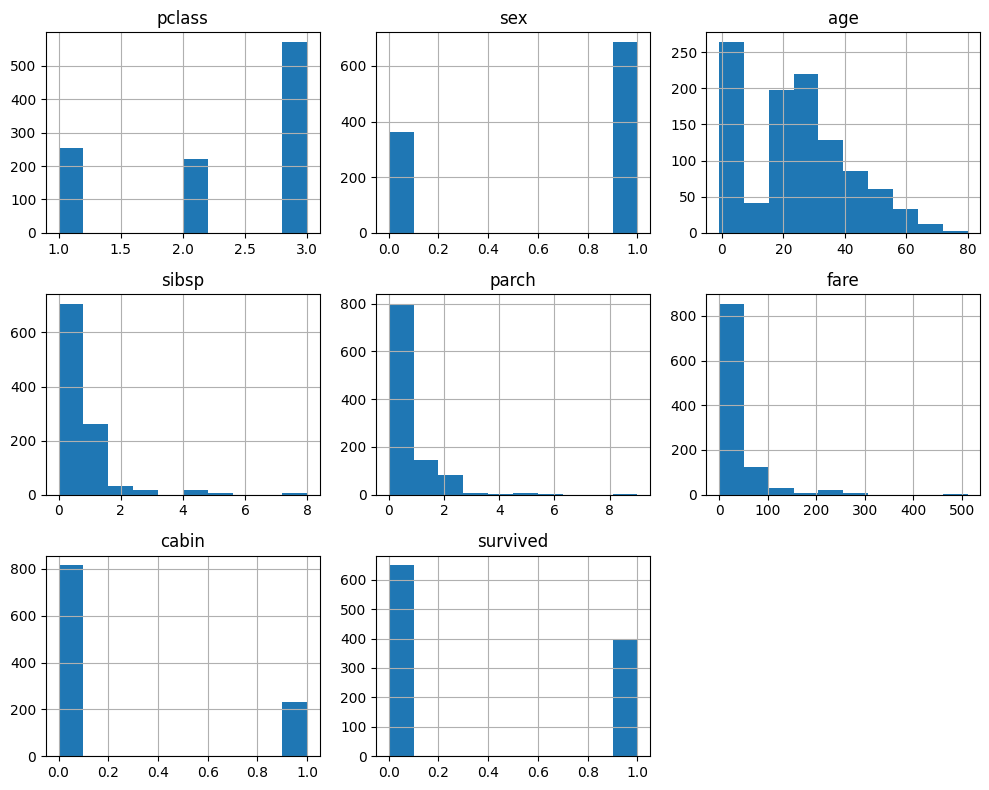

In [11]:
# Histograms for all numerical features
print("\nHistograms of numerical features:")
df.hist(figsize=(10, 8))
plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

**Insight:**

1. pclass:
- Majority of passengers are in 3rd class, followed by 1st and 2nd classes.
- This distribution indicates a larger representation of lower-class passengers.
2. sex:

- The dataset has more male passengers than female passengers.
3. age:

- The age distribution is right-skewed with a peak at a young age.
- There are some invalid age values (e.g., -1) which should be cleaned.
- Most passengers are young adults.
4. sibsp:

- Most passengers traveled with no siblings/spouses.
- A small number traveled with 1-2 siblings/spouses, and very few with more.
5. parch:

- The majority of passengers had no parents/children aboard.
- A small number had 1-2 parents/children, with very few having more.
6. fare:

- The fare distribution is heavily right-skewed.
- Most passengers paid lower fares, with a few outliers who paid significantly higher amounts.
- The presence of negative fare values indicates erroneous data that needs cleaning.
7. cabin:

- most of the passengers don't have a cabin.
8. embarked:

- Most passengers embarked from port 2 (Southampton), followed by port 1 (Cherbourg) and port 0 (Queenstown).
9. survived:

- The majority of passengers did not survive, with a survival rate of around 38%.

#### Outlier Detection


Box plots to check for outliers:


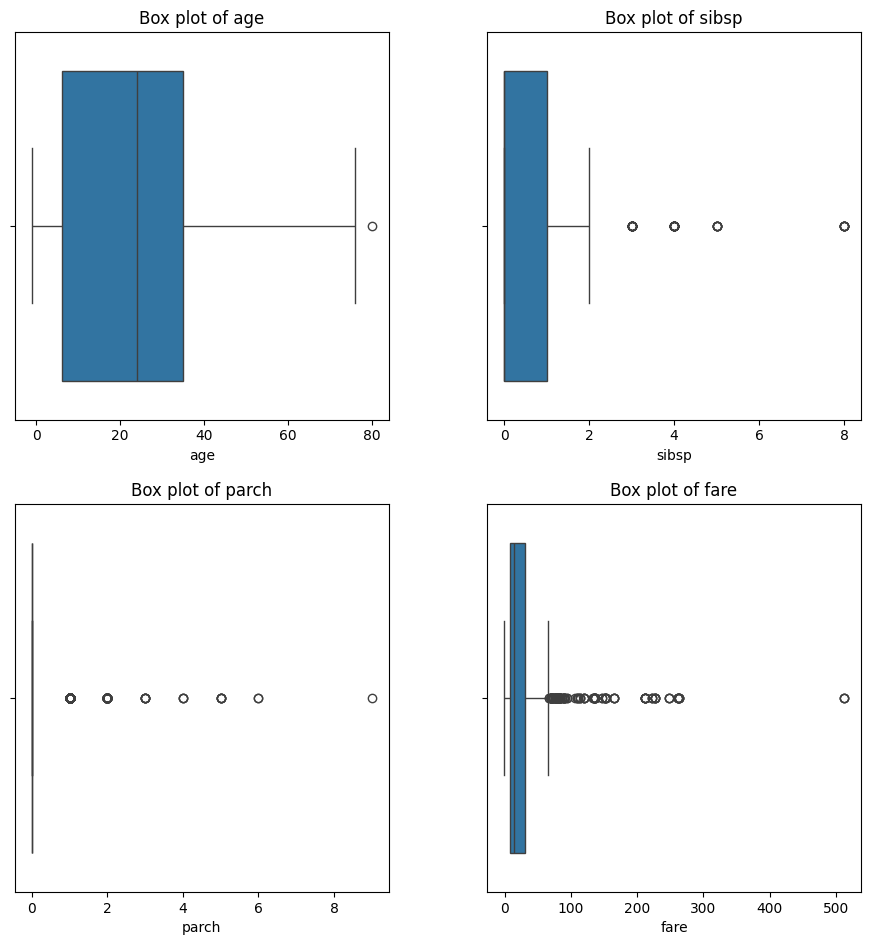

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Box plots for numerical variables to check outliers
print("\nBox plots to check for outliers:")
numeric_cols = ["age", "sibsp", "parch", "fare"]

# Set up the plot grid
n_cols = 2
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, n_rows*5))
fig.tight_layout(pad=4.0)

for i, col in enumerate(numeric_cols):
    row = i // n_cols
    col_pos = i % n_cols
    sns.boxplot(x=df[col], ax=axes[row, col_pos])
    axes[row, col_pos].set_title(f'Box plot of {col}')

# Remove empty subplots if the number of columns is odd
if len(numeric_cols) % n_cols != 0:
    for j in range(len(numeric_cols), n_rows * n_cols):
        fig.delaxes(axes.flatten()[j])

plt.show()


**Insight:**

1. age:

- The distribution of ages shows some outliers, particularly at the higher end (ages around 70-80).
- The median age is around 25, and most passengers are between 15 and 40 years old.
- The presence of an invalid value (-1) indicates a need for data cleaning.
2. sibsp:

- There are a few outliers, with some passengers having up to 8 siblings/spouses aboard.
- Most passengers have 0 siblings/spouses, with a few having 1 or 2.
3. parch:

- Similar to sibsp, there are outliers with some passengers having up to 6 parents/children aboard.
- The majority of passengers have 0 parents/children, with a few having 1 or 2.
4. fare:

- The box plot shows a uniform value for the majority of entries, suggesting missing or placeholder data.
- There are some outliers, but the overall distribution is not clear due to the uniform data.

#### Correlation Analysis

In [13]:
# embarked is string type, as we don't know how to manipulate it for the moment, we will remove it
df.drop("embarked", axis=1, inplace=True)


Correlation matrix:


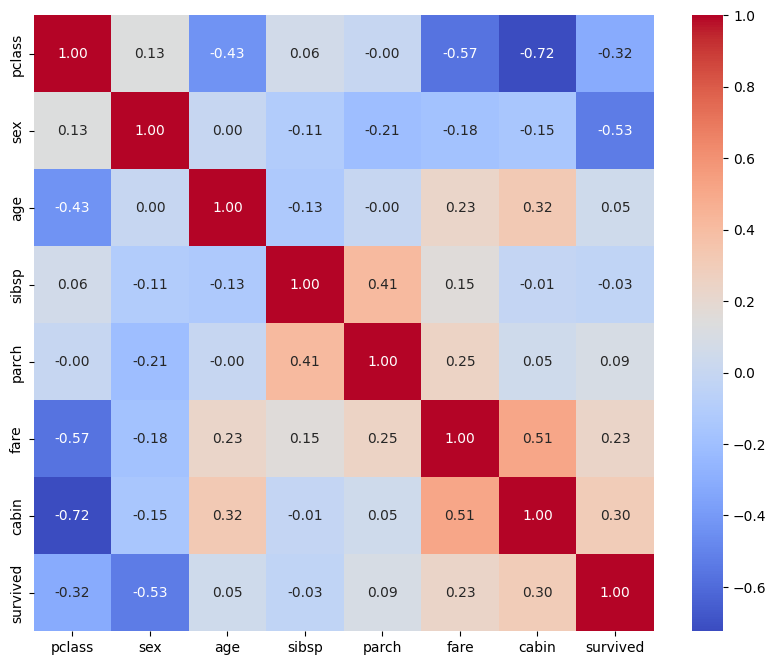

In [14]:
# Correlation matrix
print("\nCorrelation matrix:")
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

**Insight:**

1. pclass:
- Negative correlation with fare (-0.57): Higher-class passengers (lower pclass value) tend to pay higher fares.
- Negative correlation with cabin (-0.72): Higher-class passengers (lower pclass value) are more likely to have assigned cabins.
2. sex:

- Negative correlation with survived (-0.53): Being male (sex = 1) is negatively correlated with survival, suggesting females had a higher survival rate.
- Negative correlation with age (-0.00) and embarked (-0.18): Weaker, but still negative, suggesting males are slightly younger and embarked differently than females.
3. age:

- Negative correlation with pclass (-0.43): Older passengers tend to be in higher classes.
- Positive correlation with fare (0.23): Older passengers tend to pay higher fares.
- Positive correlation with cabin (0.32): Older passengers are more likely to have cabin assignments.
4. sibsp:

- Positive correlation with parch (0.41): Passengers with siblings/spouses aboard are likely to have parents/children aboard as well.
- Positive correlation with fare (0.15): Passengers with more siblings/spouses tend to pay higher fares.
5. parch:

- Positive correlation with sibsp (0.41): Similar to sibsp, passengers with parents/children aboard are likely to have siblings/spouses aboard.
- Positive correlation with fare (0.25): Passengers with more parents/children tend to pay higher fares.
6. fare:

- Negative correlation with pclass (-0.57): Higher fares are associated with higher classes.
- Positive correlation with survived (0.23): Higher fares are positively correlated with survival, suggesting that higher-paying passengers had a better chance of survival.
7. cabin:

- Negative correlation with pclass (-0.72): Passengers in higher classes are more likely to have cabin assignments.
- Positive correlation with fare (0.51): A correlation suggesting that cabin assignments are more common for higher fare-paying passengers.
- Negative correlation with age (0.32): Older passengers are more likely to have cabin assignments.

9. survived:

- The majority of passengers did not survive, with a survival rate of around 38%.


Important correlations with 'Survived':


Text(0.5, 1.0, 'Top Negative Correlations')

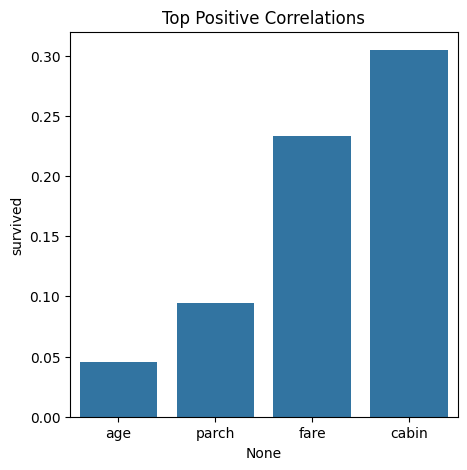

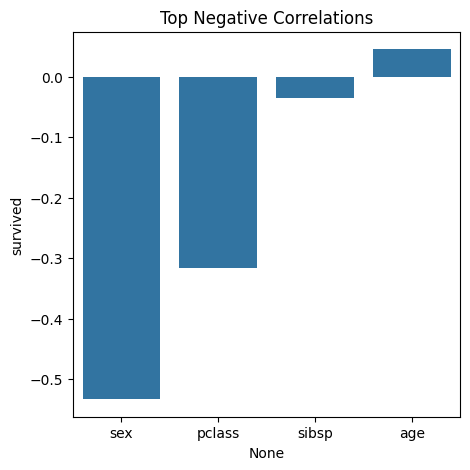

In [15]:
#### Important Correlations with 'Survived'
print("\nImportant correlations with 'Survived':")
corrs = df.corr().sort_values(by=['survived'])['survived'].iloc[:-1]
corrs_max = corrs[-4:]
corrs_min = corrs[:4]
fig, ax = plt.subplots(figsize = (5,5))
sns.barplot(x=corrs_max.index, y = corrs_max)
plt.title("Top Positive Correlations")
fig, ax = plt.subplots(figsize = (5,5))
sns.barplot(x=corrs_min.index, y = corrs_min)
plt.title("Top Negative Correlations")


Pairplot of selected features:


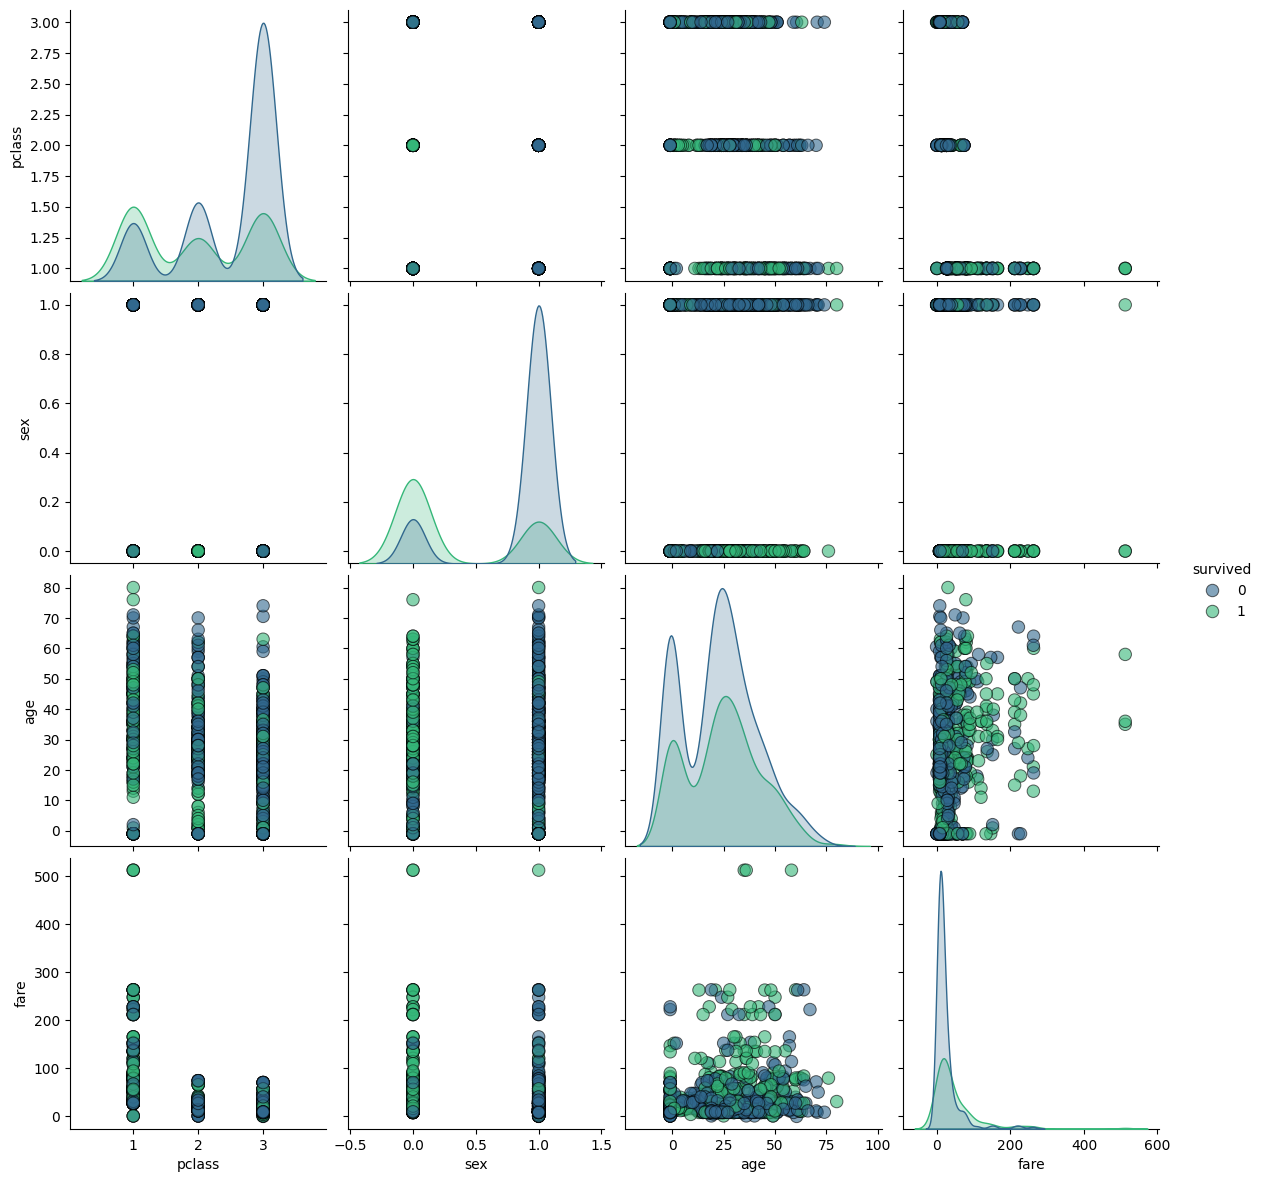

In [16]:
# Pairplot for pairwise relationships in the dataset
print("\nPairplot of selected features:")
selected_features = ['pclass', 'sex', 'age', 'fare', 'survived']

# Creating pairplot
sns.pairplot(df[selected_features], hue='survived', palette='viridis', diag_kind='kde', 
             plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             height=3)
plt.show()

**Insight:**

1. pclass vs. Survival:

- Higher survival rates are observed in lower pclass values (1st and 2nd class passengers).
- 3rd class passengers have a lower survival rate, as indicated by the clustering of non-survivors (blue points) in this category.
2. sex vs. Survival:
- Female passengers (sex = 0) have a higher survival rate compared to male passengers (sex = 1).
- This is evident from the larger number of green points (survivors) among females.
3. age vs. Survival:

- There is no clear age trend directly linked to survival, but younger passengers tend to have more survivors.
- Both young and old passengers are scattered across survived and not survived categories.
4. fare vs. Survival:

- Higher fares are positively correlated with survival. Passengers who paid higher fares (right side of the fare plot) have more green points (survivors).
- Most non-survivors are clustered in the lower fare ranges.

#### Compare distribution of train and test data

In [17]:
# Read test and apply same changes as train
X_test = pd.read_csv("module3_course_test.csv", sep=",", index_col='id')
X_test.drop("embarked", axis=1, inplace=True)

In [18]:
X_test.shape

(262, 7)

In [19]:
X_test.isnull().sum()

pclass    0
sex       1
age       0
sibsp     0
parch     0
fare      1
cabin     0
dtype: int64

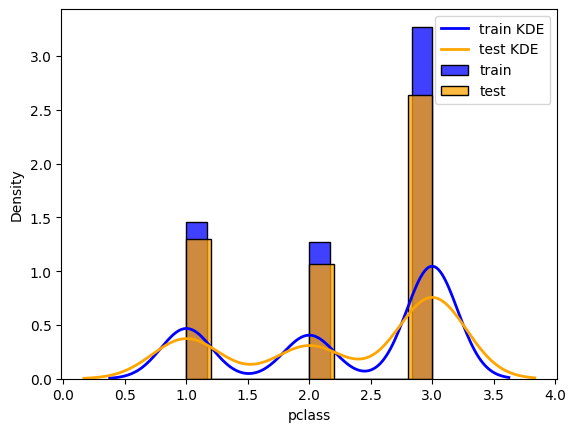

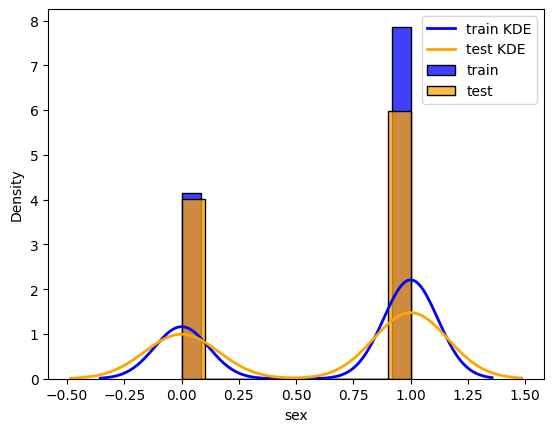

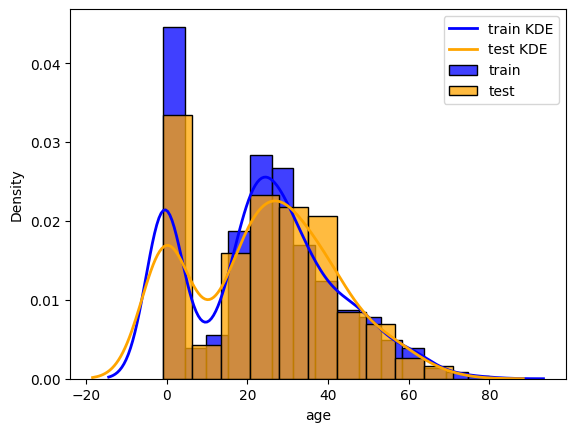

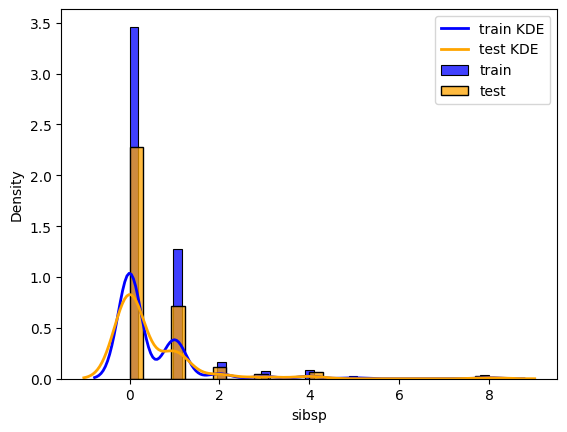

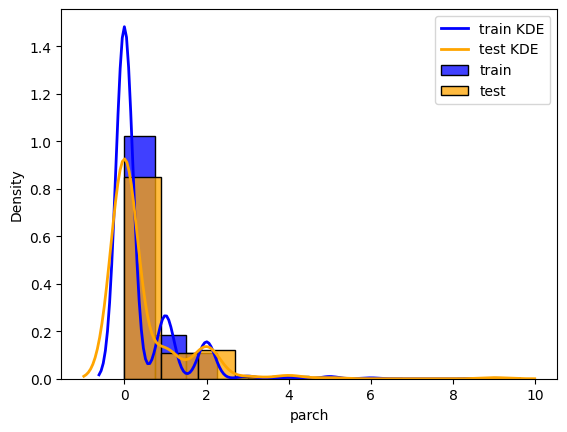

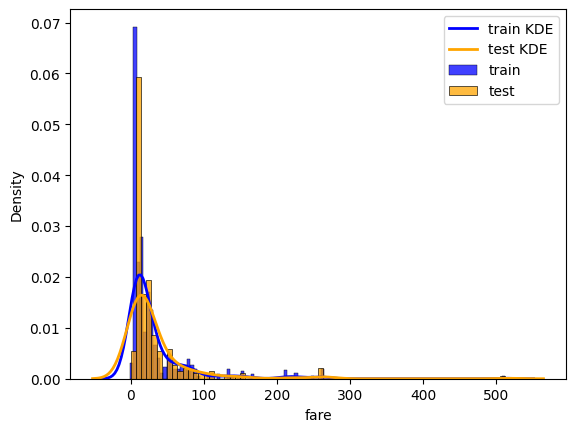

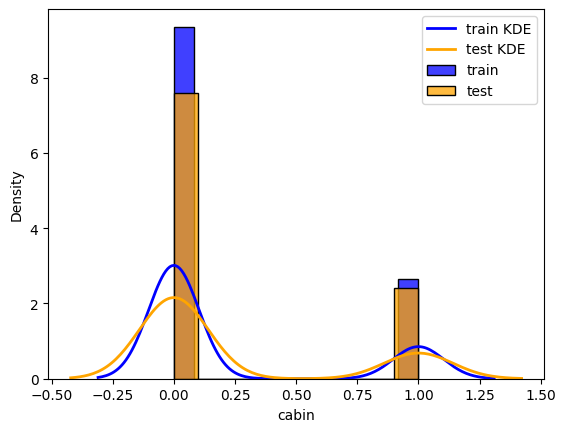

In [20]:
for col in X_test.columns:
    plt.figure()
    
    # Plot histograms for train and test
    sns.histplot(df[col], label='train', color='blue', kde=False, stat='density')
    sns.histplot(X_test[col], label='test', color='orange', kde=False, stat='density')
    
    # Overlay KDE plots for train and test
    sns.kdeplot(df[col], color='blue', label='train KDE', linewidth=2)
    sns.kdeplot(X_test[col], color='orange', label='test KDE', linewidth=2)
    
    plt.legend()
    plt.show()


**Insight:**

The 1d density is similar from train to test.

#### Automated EDA Report with Pandas Profiling

In [21]:
#!pip install ydata-profiling
from ydata_profiling import ProfileReport
# Generate the Pandas Profiling Report
profile = ProfileReport(df, title="Pandas Profiling Report - Titanic Dataset", explorative=True)

# Save the report to an HTML file (optional)
profile.to_file("titanic_data_report.html")

#profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]